# Machine Learning on the Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration and Cleaning

In [2]:
df = sns.load_dataset('titanic')  # loading the dataset

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()  # notice there is incomplete data for some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.describe() 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# We can see there are some null values in the age column
# We will drop those null's to avoid errors with our machine learning algorithm later

df.dropna(subset=['age'], inplace=True)
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [7]:
df.rename(columns={'survived': 'Survived',
                   'pclass': 'Class_Numeric',
                   'sex': 'Gender',
                   'age': 'Age',
                   'class': 'Class'}, inplace=True)

## Looking for trends in the data

#### In the film Titanic, the women and children were famously loaded onto the lifeboats first. Is this seen in the data? Also, did class differences play a part 'survivability' too?

In [8]:
# creating several groups to plot graphically 
male_female_survival = df.groupby(['Gender']).mean()

In [9]:
class_survival = df.groupby(['Class']).mean()

In [10]:
male_female_class_survival = df.groupby(['Gender','Class']).mean()

In [11]:
child_survival = df[df['Age']<18].mean()
adult_survival = df[df['Age']>18].mean()

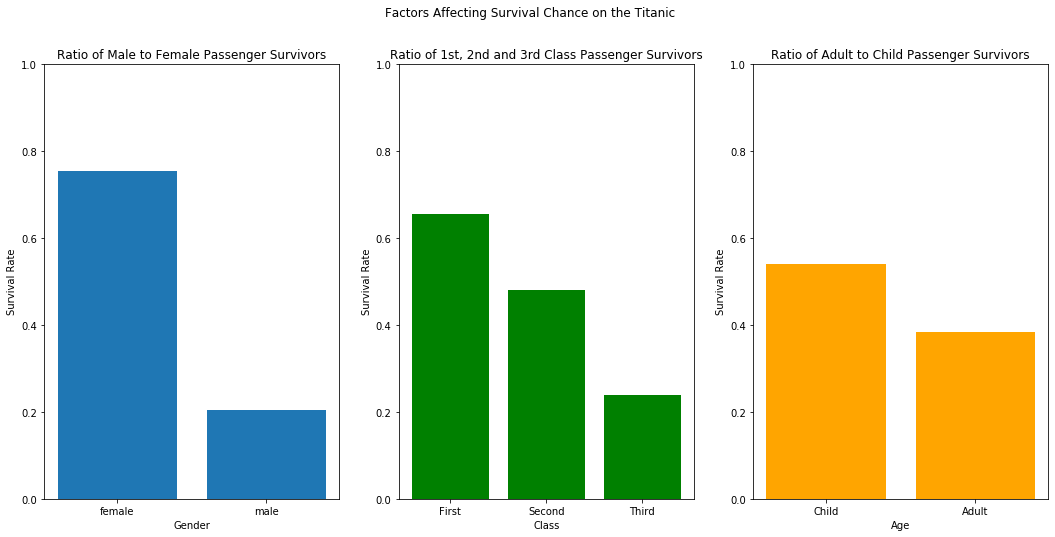

In [12]:
# Plotting the variables

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8))

ax1.bar(male_female_survival.index,male_female_survival['Survived'])
ax1.set_ylim(0, 1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Survival Rate')
ax1.set_title('Ratio of Male to Female Passenger Survivors')


ax2.bar(class_survival.index,class_survival['Survived'],color='green')
ax2.set_ylim(0, 1)
ax2.set_xlabel('Class')
ax2.set_ylabel('Survival Rate')
ax2.set_title('Ratio of 1st, 2nd and 3rd Class Passenger Survivors')

ax3.bar('Child',child_survival['Survived'],color='orange')
ax3.bar('Adult',adult_survival['Survived'],color='orange')
ax3.set_ylim(0, 1)
ax3.set_xlabel('Age')
ax3.set_ylabel('Survival Rate')
ax3.set_title('Ratio of Adult to Child Passenger Survivors')

fig.suptitle('Factors Affecting Survival Chance on the Titanic')
plt.show()

#### From the above figures, we can see that there is a clear relationship between gender, class and age with respect to survival on the Titanic. We wil use these features as the basis for our machine learning model to predict someones chance of survival aboard the Titanic.

## Using Machine Leanring to Predict Survival on the Titanic

#### Having seen that class, age and gender played a key role in whether a person survived or not, I will use those variables to train the models to be able to predict the predictor column "Survived"

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

labelencoder = LabelEncoder()

In [14]:
# creating the dataset for the ml algorithms

df_ml = df[['Survived','Gender','Class_Numeric','Age']]
df_ml.head()

,Survived,Gender,Class_Numeric,Age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0


In [15]:
#Encode gender column

df_ml.iloc[:,1] = labelencoder.fit_transform(df_ml.iloc[:,1].values)
df_ml.head()

C:\Users\Will\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Survived,Gender,Class_Numeric,Age
0,0,1,3,22.0
1,1,0,1,38.0
2,1,0,3,26.0
3,1,0,1,35.0
4,0,1,3,35.0


In [16]:
# Creating discrete bins for the age column

df_ml['Age'].astype('int64')

df_ml.loc[df_ml['Age'] <=11, 'Age'] = 0
df_ml.loc[(df_ml['Age'] >11) & (df_ml['Age'] <=18), 'Age'] = 1
df_ml.loc[(df_ml['Age'] >18) & (df_ml['Age'] <=22), 'Age'] = 2
df_ml.loc[(df_ml['Age'] >22) & (df_ml['Age'] <=27), 'Age'] = 3
df_ml.loc[(df_ml['Age'] >27) & (df_ml['Age'] <=33), 'Age'] = 4
df_ml.loc[(df_ml['Age'] >33) & (df_ml['Age'] <=40), 'Age'] = 5
df_ml.loc[(df_ml['Age'] >40) & (df_ml['Age'] <=50), 'Age'] = 6
df_ml.loc[df_ml['Age'] >50, 'Age'] = 7

In [17]:
# Checking that the proportions are relatively evenly distributed

df_ml['Age'].value_counts()

4.0    126
3.0    106
5.0    101
2.0     92
6.0     86
1.0     71
0.0     68
7.0     64
Name: Age, dtype: int64

In [18]:
# select our dependant and independant variables

X = df_ml.iloc[:,1:4]
Y = df_ml.iloc[:,0]

In [19]:
# Splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
X_train.head()  # Note the dataset has been randomised as well

,Gender,Class_Numeric,Age
387,0,2,5.0
685,1,2,3.0
20,1,2,5.0
331,1,1,6.0
396,0,3,4.0


In [21]:
LogReg = LogisticRegression(solver='lbfgs')

# Fitting the model 

LogReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Model Score

LogReg.score(X_train, Y_train)

0.7880910683012259

In [23]:
# Predicting for our test dataset

predictions = LogReg.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [24]:
# Correct results from original dataset

np.array(Y_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [25]:
# Accuracy of the model on the test data (shown on confusion matirx below below)

score_lg = round((LogReg.score(X_test, Y_test)),2)

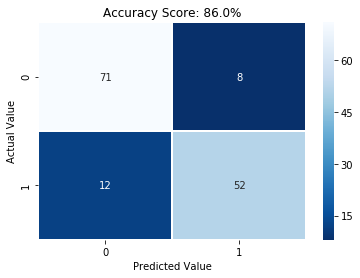

In [26]:
# Using a confusion matrix to summarise the above results
# when predicted = actual, ie 0,0 and 1,1 then that is good. When predicted != actual (0,1 or 1,0), that is a bad result

cm = metrics.confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, linewidths=1, cmap = 'Blues_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Accuracy Score: {}%'.format(score_lg*100))
plt.show()

In [27]:
# Predicting for a new person (variables listed here for reference)

# Gender: 
#   0 = Female
#   1 = Male

# Class_Numeric:
#   1 = 1st Class
#   2 = 2nd Class
#   3 = 3rd Class

# Age:
#   0 = <=11
#   1 = >11 & <=18
#   2 = >18 & <=22
#   3 = >22 & <=27
#   4 = >27 & <=33
#   5 = >33 & <=40
#   6 = >40 & <=50
#   7 = >50

new_person = [[0,2,3]]         # A female, in 2nd class, aged 23-27 (could add data for anyone using the list above)

new_survival = LogReg.predict(new_person)

if new_survival == 0:
    print("This person wouldn't have survived")
else:
    print("This person would have survived")

This person would have survived


## Would our results be better with a different ML algorithm?

#### Whilst our results are promising using logistic regression, could they be improved by using a different classification algorithm? Also, here I will use 10-fold cross validation for training the ML algorithms as it is argued that this is a superior method in terms of ensuring reliability and reproducibility of the model acuracy compared to the simple train / test split. 

In [28]:
# Additional Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Cross validation method

from sklearn.model_selection import cross_val_score

In [30]:
cv_runs = [1,2,3,4,5,6,7,8,9,10]   # to use as an index for the results dataframes

#### Decision Tree:

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

score_dtree = cross_val_score(dtree, X_train, Y_train, cv=10, scoring = "accuracy")
av_score_dtree = score_dtree.mean()
std_score_dtree = score_dtree.std()

score_dtree_df = pd.DataFrame({'Decision Tree': score_dtree}, index=cv_runs)

print(round(score_dtree_df,3)) 
print("Average Score:",round(av_score_dtree,4)*100,"%")
print("Standard Deviation:",round(std_score_dtree,4)*100,"%")

    Decision Tree
1           0.793
2           0.759
3           0.810
4           0.741
5           0.776
6           0.772
7           0.821
8           0.732
9           0.875
10          0.786
Average Score: 78.66 %
Standard Deviation: 3.9699999999999998 %


#### Random Forest:

In [32]:
rf = RandomForestClassifier(n_estimators=80)
rf.fit(X_train, Y_train)

score_rf = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
av_score_rf = score_rf.mean()
std_score_rf = score_rf.std()

score_rf_df = pd.DataFrame({'Random Forest': score_rf}, index=cv_runs)

print(round(score_rf_df,3)) 
print("Average Score:",round(av_score_rf,4)*100,"%")
print("Standard Deviation:",round(std_score_rf,4)*100,"%")

    Random Forest
1           0.793
2           0.776
3           0.810
4           0.741
5           0.793
6           0.772
7           0.857
8           0.750
9           0.875
10          0.821
Average Score: 79.89 %
Standard Deviation: 4.1000000000000005 %


#### Linear Support Vector Machine:

In [33]:
l_svm = LinearSVC(max_iter=2500)
l_svm.fit(X_train, Y_train)

score_l_svm = cross_val_score(l_svm, X_train, Y_train, cv=10, scoring = "accuracy")
av_score_l_svm = score_l_svm.mean()
std_score_l_svm = score_l_svm.std()

score_l_svm_df = pd.DataFrame({'Linear Support Vector Machine': score_l_svm}, index=cv_runs)
print(round(score_l_svm_df,3)) 

print("Average Score:",round(av_score_l_svm,4)*100,"%")
print("Standard Deviation:",round(std_score_l_svm,4)*100,"%")

    Linear Support Vector Machine
1                           0.759
2                           0.828
3                           0.741
4                           0.759
5                           0.776
6                           0.737
7                           0.857
8                           0.786
9                           0.839
10                          0.786
Average Score: 78.67 %
Standard Deviation: 3.95 %


#### K Nearest Neighbor

In [34]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)

score_knn = cross_val_score(knn, X_train, Y_train, cv=10, scoring = "accuracy")
av_score_knn = score_knn.mean()
std_score_knn = score_knn.std()

score_knn_df = pd.DataFrame({'KNN': score_knn}, index=cv_runs)
print(round(score_knn_df,3)) 

print("Average Score:",round(av_score_knn,4)*100,"%")
print("Standard Deviation:",round(std_score_knn,4)*100,"%")

      KNN
1   0.793
2   0.741
3   0.810
4   0.741
5   0.776
6   0.807
7   0.875
8   0.821
9   0.857
10  0.786
Average Score: 80.08 %
Standard Deviation: 4.15 %


#### Logistic Regression

In [35]:
# I will repeat the test with Logistic Regression with the 10-Fold cross validation for comparison

LogReg.fit(X_train, Y_train)

score_LogReg = cross_val_score(LogReg, X_train, Y_train, cv=10, scoring = "accuracy")
av_score_LogReg = score_LogReg.mean()
std_score_LogReg = score_LogReg.std()


score_LogReg_df = pd.DataFrame({'Logistic Regression': score_LogReg}, index=cv_runs)

print(round(score_LogReg_df,3)) 
print("Average Score:",round(av_score_LogReg,4)*100,"%")
print("Standard Deviation:",round(std_score_LogReg,4)*100,"%")

    Logistic Regression
1                 0.759
2                 0.845
3                 0.776
4                 0.724
5                 0.724
6                 0.719
7                 0.857
8                 0.732
9                 0.839
10                0.804
Average Score: 77.79 %
Standard Deviation: 5.18 %


#### Evaluating the Models

In [36]:
results_summary = pd.DataFrame({'Model':
                               ['Decision Tree',
                               'Random Forest',
                               'Linear SVM',
                               'K Nearest Neighbor',
                               'Logistic Regression'],
                              'Accuracy':
                               [av_score_dtree,
                               av_score_rf,
                               av_score_l_svm,
                               av_score_knn,
                               av_score_LogReg],
                               'Standard Dev':
                               [std_score_dtree,
                               std_score_rf,
                               std_score_l_svm,
                               std_score_knn,
                               std_score_LogReg]})

results_summary = results_summary.set_index('Model')
results_summary = results_summary.sort_values(by='Accuracy', ascending=False)
results_summary

,Accuracy,Standard Dev
Model,,
K Nearest Neighbor,0.800837,0.041480
Random Forest,0.798929,0.041045
Linear SVM,0.786677,0.039541
Decision Tree,0.786553,0.039697
Logistic Regression,0.777903,0.051837


#### When looking at the data above, logistic regression is arguably the worst performing model for our dataset, and it's accuracy has dropped significantly when performed with the 10-fold cross validation, compared to the 80:20 train:test split performed previously. Overall, all models appear to be fairly equally performing, however K Nearest Neighbor has the highest accuracy whilst maintaining an average level of standard deviation. This is the model I will take forward.

In [37]:
# testing the K Nearest Neighbor model on the test dataset

KNN_predictions = knn.predict(X_test)
KNN_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [38]:
np.array(Y_test)  # actual results

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [39]:
KNN_test_score = round((knn.score(X_test, Y_test)),3)   # accuracy score on real unseen data
KNN_test_score

0.783

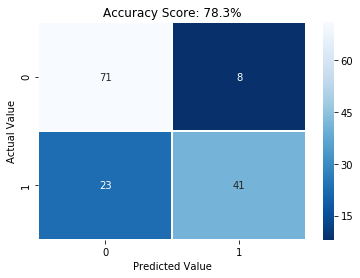

In [40]:
cm_2 = metrics.confusion_matrix(Y_test, KNN_predictions)
sns.heatmap(cm_2, annot=True, linewidths=1, cmap = 'Blues_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Accuracy Score: {}%'.format(KNN_test_score*100))
plt.show()

#### the K Nearest Neighbor model had a slightly worse accuracy score on the unseen data compared to the test data, 80.1% vs 78.3% respecitvely.  

## Comparing the two models

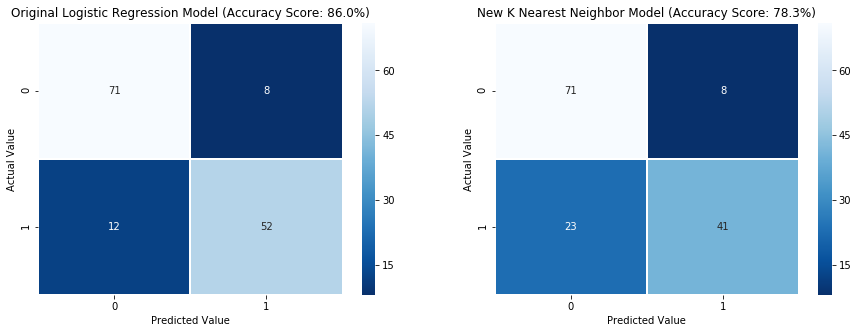

In [41]:
figure = plt.figure(figsize=(15,5))
figure.add_subplot(1, 2, 1)
sns.heatmap(cm, annot=True, linewidths=1, cmap = 'Blues_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Original Logistic Regression Model (Accuracy Score: {}%)'.format(score_lg*100))

figure.add_subplot(1, 2, 2)
sns.heatmap(cm_2, annot=True, linewidths=1, cmap = 'Blues_r')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('New K Nearest Neighbor Model (Accuracy Score: {}%)'.format(KNN_test_score*100))

plt.show()

#### Interestingly, both models predicted the same number of Ture Negatives and False positives, but the K Nerest Neighbor model is more biased towards False negative results. When looking at the accuracy scores, the original logistic regression model outperforms the K Nerest Neighbor model significantly. However, given the 10 fold cross validation method used to train the K Nerest Neighbor model, I would be more confident that this model could achieve it's accuracy rating consistently, whereas the logistic regression model is likely to be less reliable. This is seen when looking at the logistic regression model that was put through the 10 fold cross validation. There it's accuracy score was the lowest of the 5 models tested, and it's standard deviation was quite high too. Overall, I believe the K Nerest Neighbor model to be the best fit for this dataset.